Data Cleaning and EDA

De la exploracion inicial, vimos que hay que resolver varias cosas.

1-Lidiar con los null de 'gender' y 'visit_type', usando MODE

2-Usar la MEDIA cuando 'age' es inferior a 0

3-Ponerle limite a 'cost_usd' 

4-Convertir 'visit_date' a datetime

5-Estandarizar las especialidades

In [1]:
#importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import DATA_PATH, CLEAN_PATH

In [2]:
#Importando el dataset nuevamente y guardando una copia
df_original = pd.read_csv(DATA_PATH)
df =df_original.copy()

In [3]:
#Validando que no tenemos data duplicada
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
num_duplicates

np.int64(0)

Corregir los null de 'gender' y 'visit_type', usando MODE

In [3]:
#1-Lidiar con los null de 'gender' y 'visit_type', usando MODE
df = df.fillna({'gender': df['gender'].mode()[0]})
df = df.fillna({'visit_type': df['visit_type'].mode()[0]})


In [5]:
#Luego de usar mode no nos quedan valores nulos
df.isnull().sum()

patient_id                    0
age                           0
gender                        0
visit_date                    0
specialty                     0
diagnosis                     0
procedure                     0
doctor_id                     0
hospital_id                   0
city                          0
country                       0
visit_type                    0
visit_duration_minutes        0
outcome                       0
readmission_within_30_days    0
cost_usd                      0
dtype: int64

Reemplazando 'age' negativo con MEDIA

In [4]:
#2-Los 'age' < 0 reemplazar por la media
#Para comparar antes y despues usaremos la col. temporal 'old_age'
df['old_age'] = df['age'].copy()

median_age = df['age'].median()
#Aplicando la media a los valores negativos
df['age'] = df['age'].apply(lambda x: median_age if x < 0 else x)

print("\nAge before:")
display(df['old_age'].describe())
print("\nAge after:")
display(df['age'].describe())


Age before:


count    500000.000000
mean         59.410150
std          40.445605
min         -10.000000
25%          24.000000
50%          59.000000
75%          94.000000
max         129.000000
Name: old_age, dtype: float64


Age after:


count    500000.000000
mean         64.044984
std          36.208515
min           0.000000
25%          34.000000
50%          59.000000
75%          94.000000
max         129.000000
Name: age, dtype: float64

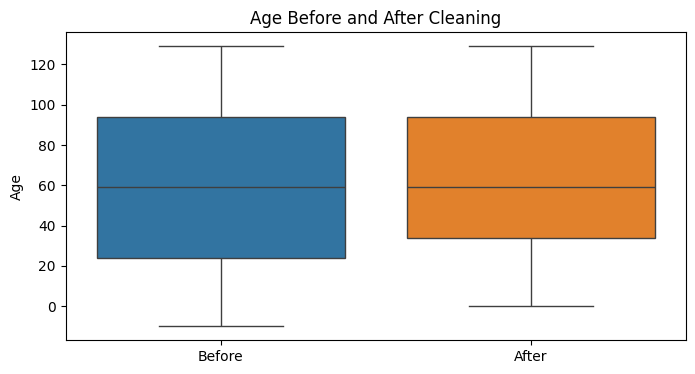

In [14]:
#Visualizando age antes y ahora
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['old_age', 'age']])
plt.title('Age Before and After Cleaning')
plt.ylabel('Age')
plt.xticks([0, 1], ['Before', 'After'])
plt.show()


Ponerle cap a 'cost_usd'

In [5]:
#3-Ponerle cap a 'cost_usd' usaremos el metodo IQR (Intequartile Range)
#Calculo de IQR for 'cost_usd'
Q1 = df['cost_usd'].quantile(0.25)
Q3 = df['cost_usd'].quantile(0.75)
IQR = Q3 - Q1
display(IQR)

#Definiendo los limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
display(lower_bound)
display(upper_bound)

#Aplicando los limites y creando nuevo dataframe -> df_cleaned
df_cleaned = df.copy()
df_cleaned['cost_usd'] = df_cleaned['cost_usd'].clip(lower=lower_bound, upper=upper_bound)


np.float64(2537.5975000000003)

np.float64(-2563.2312500000007)

np.float64(7587.1587500000005)

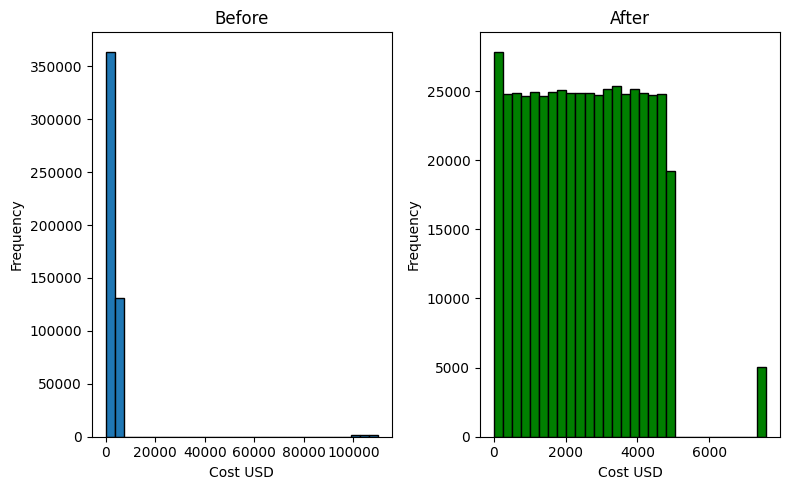

In [ ]:
#Para comparar veremos un histogram de 'cost_usd" antes de y luego de aplicar los limites
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

#Antes (con los outliers)
axes[0].hist(df['cost_usd'], bins=30, edgecolor='black')
axes[0].set_title('Before')
axes[0].set_xlabel('Cost USD')
axes[0].set_ylabel('Frequency')

#Despues (sin los outliers)
axes[1].hist(df_cleaned['cost_usd'], bins=30, edgecolor='black', color='green')
axes[1].set_title('After')
axes[1].set_xlabel('Cost USD')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Corregir formato de 'visit_date' a datetime

In [6]:
#4-Convertir 'visit_date' a datetime 
df_cleaned['visit_date'] = pd.to_datetime(df_cleaned['visit_date'], errors='coerce')

df_cleaned['visit_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 500000 entries, 0 to 499999
Series name: visit_date
Non-Null Count   Dtype         
--------------   -----         
500000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.8 MB


Normalizando los nombre de 'specialty'

In [12]:
#5-Validando los specialty names
print(df_cleaned['specialty'].nunique())
df_cleaned['specialty'].value_counts()


14


specialty
Pediatría           36019
Ginecología         35897
Cirujia             35890
Urgencias           35821
Pediatra            35726
Ginecplogía         35718
Medicina Interna    35680
Neurología          35661
Ortopedia           35661
Cirugía             35635
Dermatología        35627
Oncología           35626
Cardiolgia          35583
Cardiología         35456
Name: count, dtype: int64

In [7]:
df_cleaned['specialty'] = df_cleaned['specialty'].replace({
    'Cirujia': 'Cirugía',
    'Cardiolgia': 'Cardiología',
    'Ginecplogía': 'Ginecología',
	'Pediatra': 'Pediatría'
})

In [14]:
#validando normalizacion 
print(df_cleaned['specialty'].nunique())
df_cleaned['specialty'].value_counts()

10


specialty
Pediatría           71745
Ginecología         71615
Cirugía             71525
Cardiología         71039
Urgencias           35821
Medicina Interna    35680
Ortopedia           35661
Neurología          35661
Dermatología        35627
Oncología           35626
Name: count, dtype: int64

In [15]:
#Verificacion del dataset (df_cleaned)
print(df_cleaned.shape)
print(df_cleaned.info())


(500000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   patient_id                  500000 non-null  object        
 1   age                         500000 non-null  float64       
 2   gender                      500000 non-null  object        
 3   visit_date                  500000 non-null  datetime64[ns]
 4   specialty                   500000 non-null  object        
 5   diagnosis                   500000 non-null  object        
 6   procedure                   500000 non-null  object        
 7   doctor_id                   500000 non-null  object        
 8   hospital_id                 500000 non-null  object        
 9   city                        500000 non-null  object        
 10  country                     500000 non-null  object        
 11  visit_type                

In [8]:
#Eliminando columna temporal 'old_age' 
df_cleaned = df_cleaned.drop('old_age', axis=1)

In [17]:
display(df_cleaned.head())


,patient_id,age,gender,visit_date,specialty,diagnosis,procedure,doctor_id,hospital_id,city,country,visit_type,visit_duration_minutes,outcome,readmission_within_30_days,cost_usd
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,92.0,M,2023-03-11,Pediatría,Sunt cum.,Consequatur.,d8473694-cda8-4947-88dd-38b5c72bcefe,0fd45397-be87-48cf-94b4-180186eac1d4,Santiago,Argentina,Consulta,486,Reingreso,0,3851.00
1,23b8c1e9-3924-46de-beb1-3b9046685257,82.0,M,2020-08-14,Dermatología,Temporibus dolor.,Qui eligendi.,9d7a5834-e676-46fb-bd68-9951582578e4,94fae0f0-5bb7-4234-b00e-ce3557f2026f,Bogotá,Argentina,Hospitalización,572,Fallecimiento,1,2959.96
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,4.0,M,2023-01-03,Cardiología,Porro optio facere.,Fugiat pariatur.,09c54acd-f0ad-4a23-a5e2-d34d414d62bd,2fdd830b-52c8-45f5-b383-230c17dd7c22,Ciudad de México,Chile,Emergencia,101,Fallecimiento,0,3632.33
3,972a8469-1641-4f82-8b9d-2434e465e150,96.0,F,2020-06-15,Cirugía,Necessitatibus tempora eum.,Eaque.,bf5f0e16-c161-488e-ae99-8ecf7fb825dc,3697c736-77c4-4cc4-a6ae-b696bc49d111,Santiago,Ecuador,Emergencia,589,Alta,0,85.57
4,17fc695a-07a0-4a6e-8822-e8f36c031199,61.0,M,2021-11-05,Dermatología,Quam in.,Cupiditate ullam.,d1a80cba-621f-478a-9576-d97aa95c27b4,a89ff296-918d-474f-a697-a6e17330e3ce,Lima,Chile,Consulta,8,Fallecimiento,0,2603.25


In [ ]:
display(df_cleaned.tail())

,patient_id,age,gender,visit_date,specialty,diagnosis,procedure,doctor_id,hospital_id,city,country,visit_type,visit_duration_minutes,outcome,readmission_within_30_days,cost_usd
499995,431c9a3f-b06b-4b94-8dd5-838f2d6ac395,105.0,M,2021-08-08,Cirugía,Voluptatibus molestias ut.,Aperiam neque.,2632e35f-ead1-42d0-a76e-b09bbc591311,2b2367c6-198e-486e-92a4-c7b48591a4fc,Lima,México,Hospitalización,372,Fallecimiento,0,4962.68
499996,7f7b3b63-6448-41b6-b7b0-4e9edfee7331,35.0,F,2021-05-05,Urgencias,Ab possimus pariatur.,Error porro.,71a6b2bc-86ab-44e0-87ba-efdfdac2f8e2,d2ca8c71-daae-4438-a4b3-4ca4ffb01533,Buenos Aires,Ecuador,Emergencia,559,Reingreso,0,1799.49
499997,41679938-f4b6-48ab-baa7-011af1d90ba8,45.0,F,2024-01-28,Cirugía,Atque dicta.,Officiis.,5fb756df-a308-46f7-87bf-825841937973,b471a44d-55dd-4a36-b715-9b6fa0675278,Bogotá,Perú,Consulta,65,Referencia,0,4195.80
499998,6c299452-c15c-4dd6-9b35-9946dd9404a0,57.0,M,2021-05-15,Urgencias,Totam.,Eveniet.,b50bc8e8-c1a0-4cbd-a718-2b2b6f3ade9a,775544eb-a7e6-4335-98a7-04c2c5c60424,Santiago,Chile,Emergencia,379,Referencia,0,3474.76
499999,e8b237c0-9f41-49e9-b922-63f189d37e5e,15.0,M,2025-05-21,Pediatría,Sunt.,Omnis asperiores.,c3d7728c-526b-40e5-9392-09f64aed90e3,48b01eab-1fea-495e-ae34-623346eb4bd5,Santo Domingo,Ecuador,Emergencia,149,Alta,0,1022.39


Visualizando la data tipo Numerical

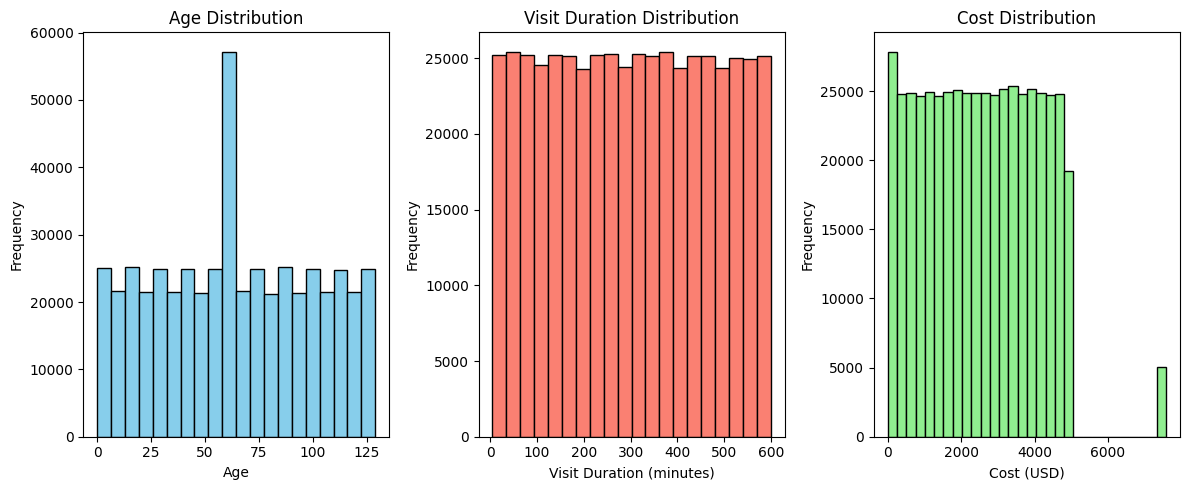

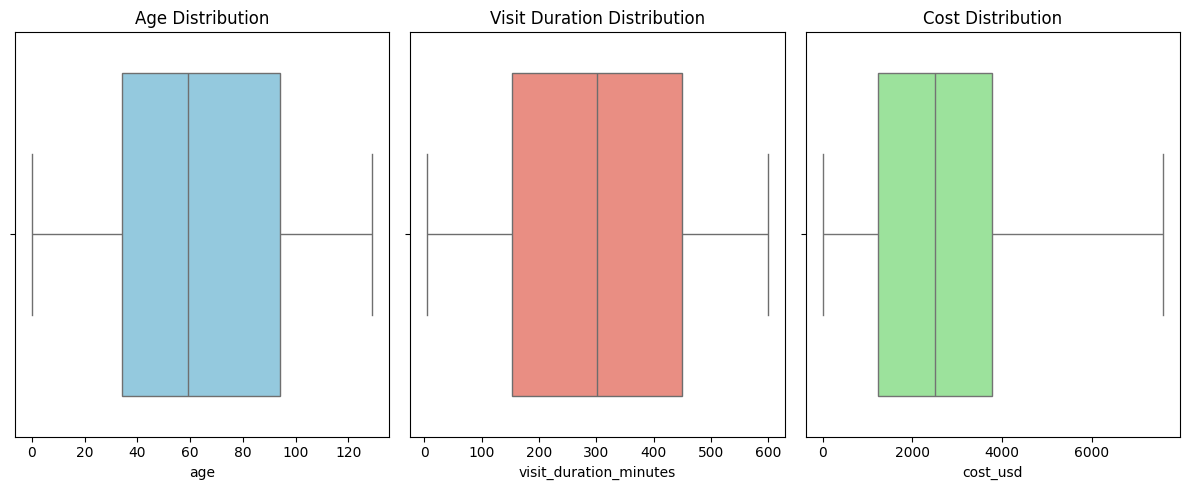

In [ ]:
#Histograms (para ver la distribucion)
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.hist(df_cleaned['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df_cleaned['visit_duration_minutes'], bins=20, color='salmon', edgecolor='black')
plt.title('Visit Duration Distribution')
plt.xlabel('Visit Duration (minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df_cleaned['cost_usd'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Cost Distribution')
plt.xlabel('Cost (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#Box plots (para ver valores min-max y promedio)
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df_cleaned['age'], color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.boxplot(x=df_cleaned['visit_duration_minutes'], color='salmon')
plt.title('Visit Duration Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(x=df_cleaned['cost_usd'], color='lightgreen')
plt.title('Cost Distribution')

plt.tight_layout()
plt.show()


Visualizando la data tipo Categorical

In [ ]:
Piecharts gender, visit_type, outcome

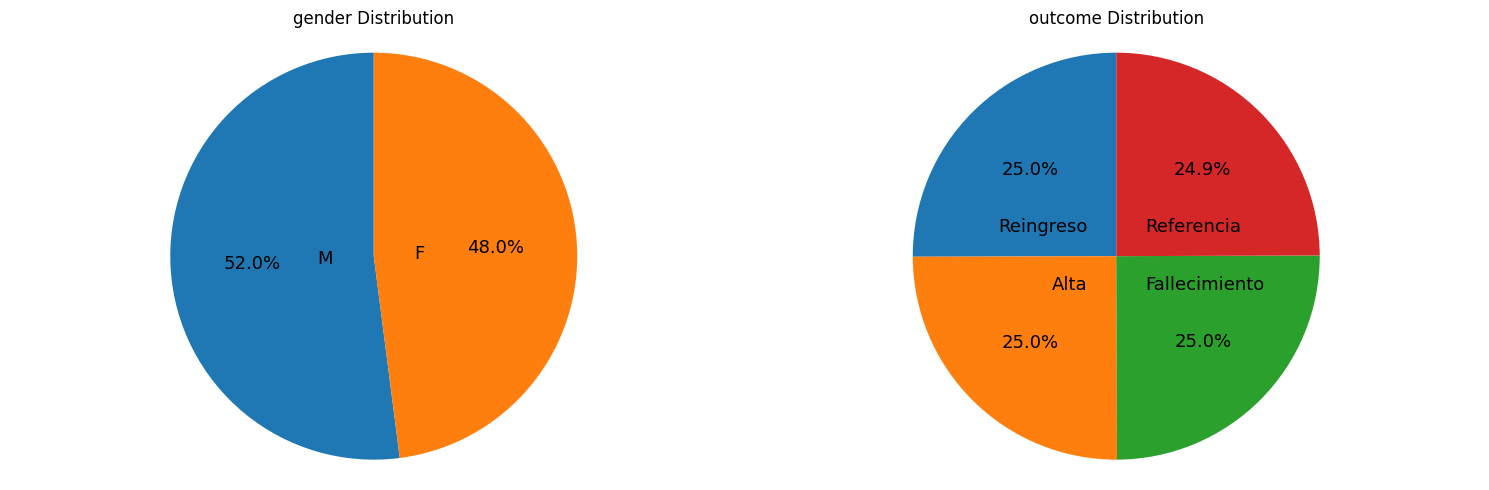

In [59]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 3 columns

columns = ['gender', 'outcome']

for i, col in enumerate(columns):
    counts = df[col].value_counts()
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        textprops={'fontsize': 13},
        labeldistance=0.2,
        startangle=90
    )
    axes[i].set_title(f'{col} Distribution', fontsize=12)
    axes[i].axis('equal')  # Keep the pie round

plt.tight_layout()
plt.show()


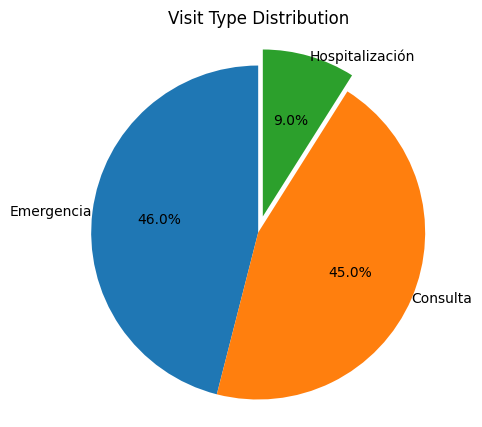

In [73]:
# Count occurrences of each category
counts = df['visit_type'].value_counts()
labels = counts.index
sizes = counts.values

# Explode the most frequent visit_type
import numpy as np
max_index = np.argmin(sizes)

explode = [0.1 if i == max_index else 0 for i in range(len(sizes))]

# Plot
plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    explode=explode,
    #textprops={'fontsize': 12},
    labeldistance=1,
    startangle=90
)
plt.title('Visit Type Distribution')
plt.axis('equal')
plt.show()

In [18]:
df_cleaned['procedure'].unique()

array(['Consequatur.', 'Qui eligendi.', 'Fugiat pariatur.', ...,
       'Atque qui.', 'Est quidem.', 'Nostrum ea.'], dtype=object)

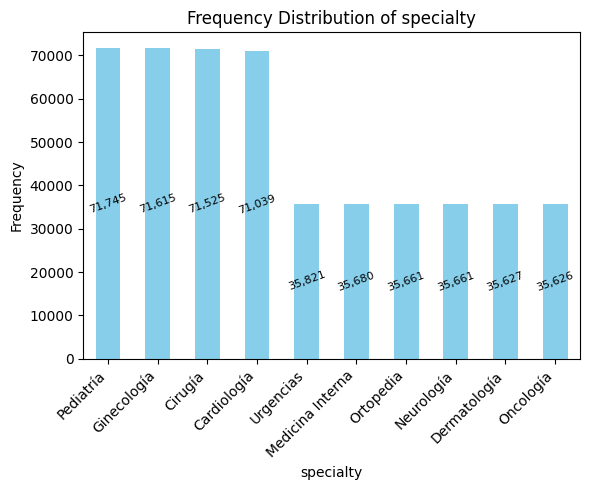

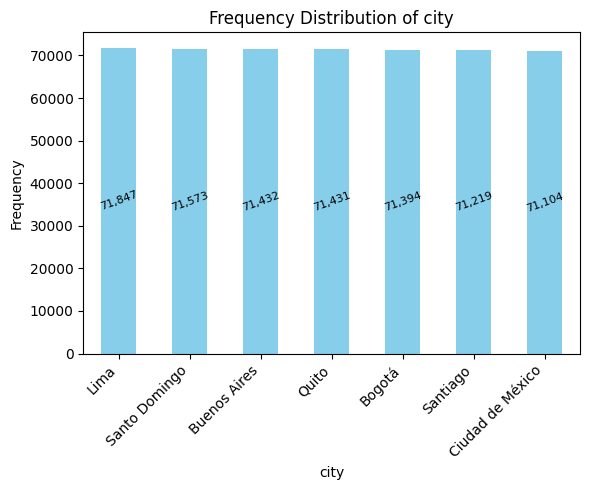

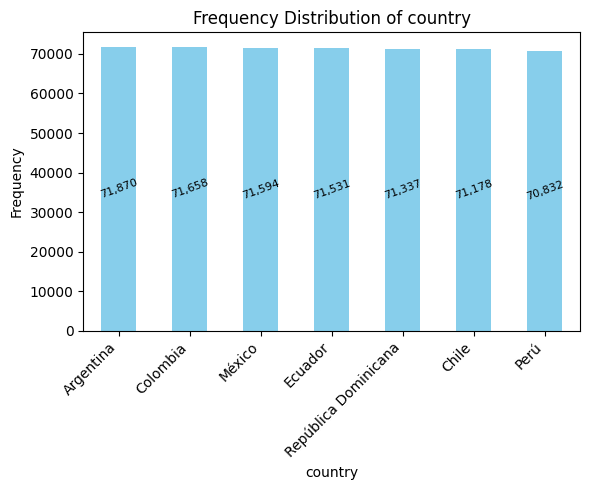

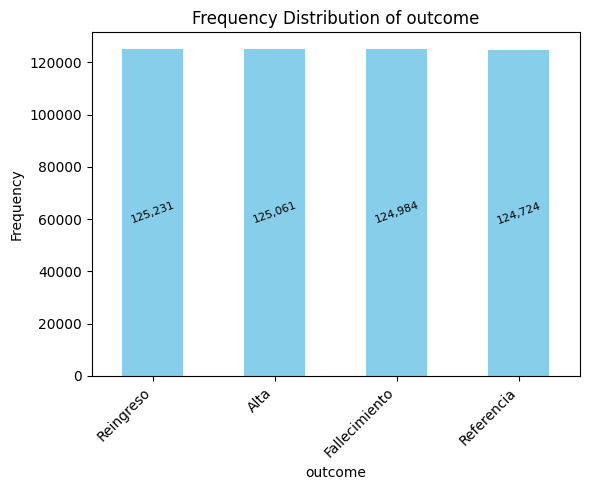

In [22]:
categorical_features = ['specialty', 'city', 'country', 'outcome']

for col in categorical_features:
    plt.figure(figsize=(6, 5))

    value_counts = df_cleaned[col].value_counts()

    #Bar chart
    ax = value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')

    #Labels numericos con comas
    for i, count in enumerate(value_counts):
        label = f"{count:,}"  
        plt.text(i, count / 2, label, ha='center', va='center', color='black', fontsize=8, rotation=20)

    plt.tight_layout()
    plt.show()


In [9]:
df_cleaned.head()

,patient_id,age,gender,visit_date,specialty,diagnosis,procedure,doctor_id,hospital_id,city,country,visit_type,visit_duration_minutes,outcome,readmission_within_30_days,cost_usd
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,92.0,M,2023-03-11,Pediatría,Sunt cum.,Consequatur.,d8473694-cda8-4947-88dd-38b5c72bcefe,0fd45397-be87-48cf-94b4-180186eac1d4,Santiago,Argentina,Consulta,486,Reingreso,0,3851.00
1,23b8c1e9-3924-46de-beb1-3b9046685257,82.0,M,2020-08-14,Dermatología,Temporibus dolor.,Qui eligendi.,9d7a5834-e676-46fb-bd68-9951582578e4,94fae0f0-5bb7-4234-b00e-ce3557f2026f,Bogotá,Argentina,Hospitalización,572,Fallecimiento,1,2959.96
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,4.0,M,2023-01-03,Cardiología,Porro optio facere.,Fugiat pariatur.,09c54acd-f0ad-4a23-a5e2-d34d414d62bd,2fdd830b-52c8-45f5-b383-230c17dd7c22,Ciudad de México,Chile,Emergencia,101,Fallecimiento,0,3632.33
3,972a8469-1641-4f82-8b9d-2434e465e150,96.0,F,2020-06-15,Cirugía,Necessitatibus tempora eum.,Eaque.,bf5f0e16-c161-488e-ae99-8ecf7fb825dc,3697c736-77c4-4cc4-a6ae-b696bc49d111,Santiago,Ecuador,Emergencia,589,Alta,0,85.57
4,17fc695a-07a0-4a6e-8822-e8f36c031199,61.0,M,2021-11-05,Dermatología,Quam in.,Cupiditate ullam.,d1a80cba-621f-478a-9576-d97aa95c27b4,a89ff296-918d-474f-a697-a6e17330e3ce,Lima,Chile,Consulta,8,Fallecimiento,0,2603.25


Exportando el dataset limpio para extraer insights y exportar a postgreSQL

In [10]:
#Exporting df
df_cleaned.to_csv(CLEAN_PATH, index=False)

Parametros para conexion a PostgreSQL

In [12]:
from sqlalchemy import create_engine
import pandas as pd 

username = 'postgres'
password = 'testingpsql'
host = 'localhost'      # or remote IP
port = '5432'           # default PostgreSQL port
database = 'testing'

engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')


Leyendo el CSV creado anteriormente (para validar que exporto correctamente)

In [14]:
df1 = pd.read_csv(CLEAN_PATH)
df1.head()

,patient_id,age,gender,visit_date,specialty,diagnosis,procedure,doctor_id,hospital_id,city,country,visit_type,visit_duration_minutes,outcome,readmission_within_30_days,cost_usd
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,92.0,M,2023-03-11,Pediatría,Sunt cum.,Consequatur.,d8473694-cda8-4947-88dd-38b5c72bcefe,0fd45397-be87-48cf-94b4-180186eac1d4,Santiago,Argentina,Consulta,486,Reingreso,0,3851.00
1,23b8c1e9-3924-46de-beb1-3b9046685257,82.0,M,2020-08-14,Dermatología,Temporibus dolor.,Qui eligendi.,9d7a5834-e676-46fb-bd68-9951582578e4,94fae0f0-5bb7-4234-b00e-ce3557f2026f,Bogotá,Argentina,Hospitalización,572,Fallecimiento,1,2959.96
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,4.0,M,2023-01-03,Cardiología,Porro optio facere.,Fugiat pariatur.,09c54acd-f0ad-4a23-a5e2-d34d414d62bd,2fdd830b-52c8-45f5-b383-230c17dd7c22,Ciudad de México,Chile,Emergencia,101,Fallecimiento,0,3632.33
3,972a8469-1641-4f82-8b9d-2434e465e150,96.0,F,2020-06-15,Cirugía,Necessitatibus tempora eum.,Eaque.,bf5f0e16-c161-488e-ae99-8ecf7fb825dc,3697c736-77c4-4cc4-a6ae-b696bc49d111,Santiago,Ecuador,Emergencia,589,Alta,0,85.57
4,17fc695a-07a0-4a6e-8822-e8f36c031199,61.0,M,2021-11-05,Dermatología,Quam in.,Cupiditate ullam.,d1a80cba-621f-478a-9576-d97aa95c27b4,a89ff296-918d-474f-a697-a6e17330e3ce,Lima,Chile,Consulta,8,Fallecimiento,0,2603.25


Exportando la data del CSV a postgres

In [15]:
df1.to_sql(
    name='atenciones_medicas',
    con=engine,
    schema='public', 
    if_exists='replace',       
    index=False              
)


1000

In [16]:
#Revisando que la data fue cargada
query = "SELECT * FROM public.atenciones_medicas LIMIT 100;"

# Execute query and load into DataFrame
df2 = pd.read_sql(query, con=engine)

# Preview the result
print(df.head())

                             patient_id   age gender  visit_date  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d  92.0      M  2023-03-11   
1  23b8c1e9-3924-46de-beb1-3b9046685257  82.0      M  2020-08-14   
2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9   4.0      M  2023-01-03   
3  972a8469-1641-4f82-8b9d-2434e465e150  96.0      F  2020-06-15   
4  17fc695a-07a0-4a6e-8822-e8f36c031199  61.0      M  2021-11-05   

      specialty                    diagnosis          procedure  \
0     Pediatría                    Sunt cum.       Consequatur.   
1  Dermatología            Temporibus dolor.      Qui eligendi.   
2    Cardiolgia          Porro optio facere.   Fugiat pariatur.   
3       Cirujia  Necessitatibus tempora eum.             Eaque.   
4  Dermatología                     Quam in.  Cupiditate ullam.   

                              doctor_id                           hospital_id  \
0  d8473694-cda8-4947-88dd-38b5c72bcefe  0fd45397-be87-48cf-94b4-180186eac1d4   
1  9d7a5834-e676-46fb-bd68